#Init

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import re
import json
import pandas as pd
import numpy as np
import spacy

from numpy import nan

In [0]:
file = 'Save_3.txt'

with open(file, mode='r+', encoding="utf-8") as script:
	developer = json.load(script)
script.close()
developer = re.sub(r'null','None',developer)

DF1t = pd.DataFrame.from_dict(eval(developer))
DF_ScriptPersoFilm = DF1t.T

In [0]:
Speeches = DF_ScriptPersoFilm['Speech'].tolist()

In [0]:
import gensim

In [0]:
Idx_toDrop = []
for i, speech in enumerate(Speeches):
  CleanSp = gensim.utils.simple_preprocess(speech)
  try:
    if type(CleanSp[0]) is list:
      continue
  except:
    Idx_toDrop.append(i)
    continue

In [0]:
file = '/content/drive/My Drive/Weight_Matrix2.txt'

with open(file, mode="r", encoding="utf-8") as script:
  
  WM_dict = eval(script.read())
script.close()

Weight_Matrix_DF = pd.DataFrame.from_dict(WM_dict)

In [0]:
DF_SPF = DF_ScriptPersoFilm.drop(DF_ScriptPersoFilm.index[Idx_toDrop])

In [0]:
DF_SPF = DF_SPF.reset_index()

In [0]:
Weight_Matrix_DF['Speech'] = DF_ScriptPersoFilm['Speech'].values

In [0]:
print(len(Weight_Matrix_DF['Speech'].values))

16327


In [0]:
print(WM_DF_drpna.shape)

(15216, 5)


In [0]:
with open('/content/drive/My Drive/CleanSpeeches2.txt', mode="r", encoding="utf-8") as script:
  CleanSpeeches = eval(script.read())
script.close()
CleanSpeeches = pd.Series(CleanSpeeches)

Weight_Matrix_DF['CleanSpeeches'] = CleanSpeeches.values

In [0]:
print(Weight_Matrix_DF['Speech'].head)
print(Weight_Matrix_DF['CleanSpeeches'].head)

<bound method NDFrame.head of 0        Did you change your hair? You might wanna thin...
1        Nice to see you.  Martini bar to the right, sh...
2                                Hey, Bianca. Hey, Bianca.
3        I can count. Go ahead. And you Take it easy on...
4        I don't think so, ma'am So they tell me... Nor...
                               ...                        
16322    Now who can tell me what happened when the pri...
16323            No, he's askin1 you a question, ya idiot.
16324    I'll be back to take your order. Are you ready...
16325    Oh, Phil. He ain't there. You can wait all nig...
16326    Hey.     Are you okay? Peter?    What's the ma...
Name: Speech, Length: 16327, dtype: object>
<bound method NDFrame.head of 0        did you change your hair you might wanna think...
1        nice to see you martini bar to the right shots...
2                                   hey Bianca hey Bianca 
3        can count go ahead and you take it easy on the...
4        do

In [0]:
WM_DF_dropna = Weight_Matrix_DF.dropna()

#Keras

In [8]:
from numpy import array
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers.core import Activation, Dropout, Dense
from keras.layers import Flatten, LSTM
from keras.layers import GlobalMaxPooling1D
from keras.models import Model
from keras.layers.embeddings import Embedding
from sklearn.model_selection import train_test_split
from keras.preprocessing.text import Tokenizer
from keras.layers import Input
from keras.layers.merge import Concatenate

import pandas as pd
import numpy as np
import re

import matplotlib.pyplot as plt

Using TensorFlow backend.


In [0]:
def preprocess_text(sen):
    # Remove punctuations and numbers
    sentence = re.sub('[^a-zA-Z]', ' ', sen)

    # Single character removal
    sentence = re.sub(r"\s+[a-zA-Z]\s+", ' ', sentence)

    # Removing multiple spaces
    sentence = re.sub(r'\s+', ' ', sentence)

    return sentence

##single output - multilabels

In [0]:
WMDF_labels = WM_DF_dropna[['aptitude','attention','pleasantness', 'sensitivity']]
y = WMDF_labels.values

In [0]:
X = []
sentences = WM_DF_dropna["CleanSpeeches"].to_list()
for sen in sentences:
    X.append(preprocess_text(sen))

In [0]:
X_train, X_test, y_train, y_test = train_test_split(sentences, y, test_size=0.20, random_state=42)

In [0]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

vocab_size = len(tokenizer.word_index) + 1

maxlen = 500

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [0]:
print(X_train)
print(X_train.shape)

[[ 896    5  425 ...    8  120  678]
 [4518  303  449 ... 4889    6 1189]
 [  11    2   23 ...    0    0    0]
 ...
 [  10   67    3 ...    0    0    0]
 [3370  950   34 ...   14  825   16]
 [   2 1576   18 ...    0    0    0]]
(12172, 200)


In [0]:
from numpy import array
from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()

In [0]:
dense_inputs = Input(shape=(maxlen,))
dense_layer_1 = Dense(128, activation='tanh')(dense_inputs)
drop_layer_1 = Dropout(0.1)(dense_layer_1)
dense_layer_2 = Dense(64, activation='tanh')(drop_layer_1)
drop_layer_2 = Dropout(0.1)(dense_layer_2)
dense_layer_3 = Dense(8, activation='tanh') (drop_layer_2)
drop_layer_3 = Dropout(0.1)(dense_layer_3)
dense_layer_4 = Dense(4, activation='tanh')(drop_layer_3)
model0 = Model(inputs=dense_inputs, outputs=dense_layer_4)

In [0]:
model0.compile(loss='mean_absolute_error', optimizer='sgd', metrics=['acc'])

In [31]:
history0 = model0.fit(X_train, y_train, batch_size=1024, epochs=50, verbose=1)

Epoch 1/50
31625/31625 [==============================] - 0s 4us/step - loss: 0.2009 - acc: 0.2928
Epoch 2/50
31625/31625 [==============================] - 0s 4us/step - loss: 0.1981 - acc: 0.2929
Epoch 3/50
31625/31625 [==============================] - 0s 4us/step - loss: 0.1971 - acc: 0.2918
Epoch 4/50
31625/31625 [==============================] - 0s 4us/step - loss: 0.1941 - acc: 0.2997
Epoch 5/50
31625/31625 [==============================] - 0s 4us/step - loss: 0.1926 - acc: 0.2990
Epoch 6/50
31625/31625 [==============================] - 0s 4us/step - loss: 0.1905 - acc: 0.2932
Epoch 7/50
31625/31625 [==============================] - 0s 4us/step - loss: 0.1888 - acc: 0.2991
Epoch 8/50
31625/31625 [==============================] - 0s 4us/step - loss: 0.1867 - acc: 0.2966
Epoch 9/50
31625/31625 [==============================] - 0s 4us/step - loss: 0.1845 - acc: 0.2991
Epoch 10/50
31625/31625 [==============================] - 0s 4us/step - loss: 0.1823 - acc: 0.3068
Epoch 11/

In [66]:
score = model0.evaluate(X_test, y_test, verbose=1)

print("Test Score:", score[0])
print("Test Accuracy:", score[1])

7907/7907 [==============================] - 0s 43us/step
Test Score: 0.4034093646774314
Test Accuracy: 0.2528139650821686


In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [0]:
def baseline_model():
  # create model
  model = Sequential()
  model.add(Dense(32, input_dim=maxlen, kernel_initializer='normal', activation='relu'))
  model.add(Dense(4, activation='tanh', kernel_initializer='normal'))
  # Compile model
  model.compile(loss='mean_squared_error', optimizer='adam')
  return model
# evaluate model
estimator = KerasRegressor(build_fn=baseline_model, epochs=10, batch_size=512, verbose=0)
kfold = KFold(n_splits=10)
results = cross_val_score(estimator, X_train, y_train, cv=kfold)

In [24]:
print("Baseline: %.2f (%.2f) MSE" % (results.mean(), results.std()))

Baseline: -0.55 (0.21) MSE


In [0]:
glove_file = open('/content/drive/My Drive/glove.6B.100d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = np.asarray(records[1:], dtype='float32')
    embeddings_dictionary[word] = vector_dimensions
glove_file.close()

embedding_matrix = zeros((vocab_size, 100))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

###Model 1

In [0]:
deep_inputs = Input(shape=(maxlen,))
embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], trainable=False)(deep_inputs)
LSTM_Layer_1 = LSTM(128)(embedding_layer)
dense_layer_1 = Dense(4, activation='tanh')(LSTM_Layer_1)
model = Model(inputs=deep_inputs, outputs=dense_layer_1)

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

In [21]:
history = model.fit(X_train, y_train, batch_size=128, epochs=5, verbose=1, validation_split=0.2)

Train on 25300 samples, validate on 6325 samples
Epoch 1/5
25300/25300 [==============================] - 148s 6ms/step - loss: 0.3238 - acc: 0.0662 - val_loss: 0.2969 - val_acc: 0.0672
Epoch 2/5
25300/25300 [==============================] - 148s 6ms/step - loss: 0.2964 - acc: 0.0662 - val_loss: 0.2940 - val_acc: 0.0672
Epoch 3/5
25300/25300 [==============================] - 147s 6ms/step - loss: 0.2965 - acc: 0.0662 - val_loss: 0.2976 - val_acc: 0.0672
Epoch 4/5
25300/25300 [==============================] - 149s 6ms/step - loss: 0.2883 - acc: 0.0662 - val_loss: 0.2921 - val_acc: 0.0672
Epoch 5/5
25300/25300 [==============================] - 146s 6ms/step - loss: 0.2873 - acc: 0.0662 - val_loss: 0.2919 - val_acc: 0.0672


In [22]:
score = model.evaluate(X_test, y_test, verbose=1)

print("Test Score:", score[0])
print("Test Accuracy:", score[1])

7907/7907 [==============================] - 16s 2ms/step
Test Score: 0.284324601162576
Test Accuracy: 0.06636524945497513


###Model 1.1

In [0]:
model.compile(loss='mean_absolute_percentage_error', optimizer='adam', metrics=['acc'])
history2 = model.fit(X_train, y_train, batch_size=4096, epochs=10, verbose=1, validation_split=0.2)

score = model.evaluate(X_test, y_test, verbose=1)

print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Train on 9737 samples, validate on 2435 samples
Epoch 1/10
9737/9737 [==============================] - 49s 5ms/step - loss: 7677792.8575 - acc: 0.3368 - val_loss: 7700948.5000 - val_acc: 0.3380
Epoch 2/10
9737/9737 [==============================] - 45s 5ms/step - loss: 7677650.6623 - acc: 0.3368 - val_loss: 7700909.0000 - val_acc: 0.3380
Epoch 3/10
9737/9737 [==============================] - 45s 5ms/step - loss: 7677613.9209 - acc: 0.3368 - val_loss: 7700899.0000 - val_acc: 0.3380
Epoch 4/10
9737/9737 [==============================] - 45s 5ms/step - loss: 7677604.7604 - acc: 0.3368 - val_loss: 7700894.0000 - val_acc: 0.3380
Epoch 5/10
9737/9737 [==============================] - 46s 5ms/step - loss: 7677601.1036 - acc: 0.3368 - val_loss: 7700893.0000 - val_acc: 0.3380
Epoch 6/10
9737/9737 [==============================] - 46s 5ms/step - loss: 7677600.1178 - acc: 0.3368 - val_loss: 7700892.0000 - val_acc: 0.3380
Epoch 7/10
9737/9737 [==============================] - 46s 5ms/step -

###Model 2

In [0]:
deep_inputs = Input(shape=(maxlen,))
embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], trainable=False)(deep_inputs)
LSTM_Layer_1 = LSTM(128)(embedding_layer)
Drop_Out_1 = Dropout(rate=0.1,seed=42)(LSTM_Layer_1)
dense_layer_1 = Dense(4, activation='softmax')(Drop_Out_1)
model2 = Model(inputs=deep_inputs, outputs=dense_layer_1)

In [0]:
model2.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         (None, 200)               0         
_________________________________________________________________
embedding_5 (Embedding)      (None, 200, 100)          5192600   
_________________________________________________________________
lstm_4 (LSTM)                (None, 128)               117248    
_________________________________________________________________
dropout_2 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 516       
Total params: 5,310,364
Trainable params: 117,764
Non-trainable params: 5,192,600
_________________________________________________________________


In [0]:
model2.compile(loss='mean_absolute_percentage_error', optimizer='adam', metrics=['acc'])
history3 = model2.fit(X_train, y_train, batch_size=512, epochs=5, verbose=1, validation_split=0.2)

score = model2.evaluate(X_test, y_test, verbose=1)

print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Train on 9737 samples, validate on 2435 samples
Epoch 1/5
9737/9737 [==============================] - 44s 5ms/step - loss: 11894230.5476 - acc: 0.2555 - val_loss: 7821564.3117 - val_acc: 0.3380
Epoch 2/5
9737/9737 [==============================] - 44s 5ms/step - loss: 7759955.9618 - acc: 0.3367 - val_loss: 7704412.2259 - val_acc: 0.3380
Epoch 3/5
9737/9737 [==============================] - 43s 4ms/step - loss: 7684019.5011 - acc: 0.3367 - val_loss: 7702606.1883 - val_acc: 0.3380
Epoch 4/5
9737/9737 [==============================] - 43s 4ms/step - loss: 7682179.2236 - acc: 0.3367 - val_loss: 7702286.8224 - val_acc: 0.3380
Epoch 5/5
3044/3044 [==============================] - 6s 2ms/step
Test Score: 6984680.1662933305
Test Accuracy: 0.3449408710002899


In [0]:
deep_inputs = Input(shape=(maxlen,))
embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], trainable=False)(deep_inputs)
LSTM_Layer_1 = LSTM(128)(embedding_layer)
Drop_Out_1 = Dropout(rate=0.1,seed=42)(LSTM_Layer_1)
dense_layer_1 = Dense(4, activation='softmax')(Drop_Out_1)
model2 = Model(inputs=deep_inputs, outputs=dense_layer_1)

NameError: ignored

##CleanSpeech

In [0]:
Xclean = []
sentences = WM_DF_dropna['CleanSpeeches'].to_list()
for sen in sentences:
  Xclean.append(preprocess_text(sen))

In [0]:
Xclean_train, Xclean_test, yclean_train, yclean_test = train_test_split(Xclean, y, test_size=0.20, random_state=42)

In [0]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(Xclean_train)

Xclean_train = tokenizer.texts_to_sequences(Xclean_train)
Xclean_test = tokenizer.texts_to_sequences(Xclean_test)

vocab_size_clean = len(tokenizer.word_index) + 1

maxlen = 200

Xclean_train = pad_sequences(Xclean_train, padding='post', maxlen=maxlen)
Xclean_test = pad_sequences(Xclean_test, padding='post', maxlen=maxlen)

AttributeError: ignored

In [0]:
history4 = model.fit(Xclean_train, yclean_train, batch_size=512, epochs=5, verbose=1, validation_split=0.2)

score = model2.evaluate(Xclean_test, yclean_test, verbose=1)

print("Test Score:", score[0])
print("Test Accuracy:", score[1])

Train on 9737 samples, validate on 2435 samples
Epoch 1/5
9737/9737 [==============================] - 46s 5ms/step - loss: 7677595.9155 - acc: 0.3367 - val_loss: 7700888.7222 - val_acc: 0.3380
Epoch 2/5
9737/9737 [==============================] - 47s 5ms/step - loss: 7677595.1790 - acc: 0.3367 - val_loss: 7700888.6170 - val_acc: 0.3380
Epoch 3/5
9737/9737 [==============================] - 47s 5ms/step - loss: 7677595.8414 - acc: 0.3367 - val_loss: 7700890.3273 - val_acc: 0.3380
Epoch 4/5
9737/9737 [==============================] - 47s 5ms/step - loss: 7677596.5793 - acc: 0.3367 - val_loss: 7700889.9068 - val_acc: 0.3380
Epoch 5/5
3044/3044 [==============================] - 7s 2ms/step
Test Score: 6984680.170498581
Test Accuracy: 0.3449408710002899


## multiple output - multilabels

In [0]:
y = WM_DF_dropna[['aptitude','attention','pleasantness', 'sensitivity']]

In [0]:
X = []
sentences = WM_DF_dropna["CleanSpeeches"].to_list()
for sen in sentences:
    X.append(preprocess_text(sen))

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [0]:
# First output
y1_train = y_train[['aptitude']].values
y1_test =  y_test[["aptitude"]].values

# Second output
y2_train = y_train[["attention"]].values
y2_test =  y_test[["attention"]].values

# Third output
y3_train = y_train[["sensitivity"]].values
y3_test =  y_test[["sensitivity"]].values

# Fourth output
y4_train = y_train[["pleasantness"]].values
y4_test =  y_test[["pleasantness"]].values

In [0]:
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(X_train)

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

vocab_size = len(tokenizer.word_index) + 1

maxlen = 200

X_train = pad_sequences(X_train, padding='post', maxlen=maxlen)
X_test = pad_sequences(X_test, padding='post', maxlen=maxlen)

In [0]:
from numpy import array
from numpy import asarray
from numpy import zeros

embeddings_dictionary = dict()

In [0]:
glove_file = open('/content/drive/My Drive/glove.6B.100d.txt', encoding="utf8")

for line in glove_file:
    records = line.split()
    word = records[0]
    vector_dimensions = np.asarray(records[1:], dtype='float32')
    embeddings_dictionary[word] = vector_dimensions
glove_file.close()

embedding_matrix = zeros((vocab_size, 100))
for word, index in tokenizer.word_index.items():
    embedding_vector = embeddings_dictionary.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

In [0]:
input_1 = Input(shape=(maxlen,))
embedding_layer = Embedding(vocab_size, 100, weights=[embedding_matrix], trainable=False)(input_1)
LSTM_Layer1 = LSTM(128)(embedding_layer)

output1 = Dense(1, activation='tanh')(LSTM_Layer1)
output2 = Dense(1, activation='tanh')(LSTM_Layer1)
output3 = Dense(1, activation='tanh')(LSTM_Layer1)
output4 = Dense(1, activation='tanh')(LSTM_Layer1)

model2 = Model(inputs=input_1, outputs=[output1, output2, output3, output4])
model2.compile(loss='binary_crossentropy', optimizer='adam', metrics=['acc'])

In [44]:
history = model2.fit(x=X_train, y=[y1_train, y2_train, y3_train, y4_train], batch_size=512, epochs=5, verbose=1, validation_split=0.2)

Train on 25300 samples, validate on 6325 samples
Epoch 1/5
25300/25300 [==============================] - 16s 615us/step - loss: 1.5727 - dense_30_loss: 0.3621 - dense_31_loss: 0.4344 - dense_32_loss: 0.3187 - dense_33_loss: 0.4542 - dense_30_acc: 0.0423 - dense_31_acc: 0.0527 - dense_32_acc: 0.1352 - dense_33_acc: 0.0347 - val_loss: 1.4101 - val_dense_30_loss: 0.3278 - val_dense_31_loss: 0.3721 - val_dense_32_loss: 0.2933 - val_dense_33_loss: 0.4092 - val_dense_30_acc: 0.0432 - val_dense_31_acc: 0.0509 - val_dense_32_acc: 0.1410 - val_dense_33_acc: 0.0337
Epoch 2/5
25300/25300 [==============================] - 15s 590us/step - loss: 1.2443 - dense_30_loss: 0.3146 - dense_31_loss: 0.3507 - dense_32_loss: 0.1740 - dense_33_loss: 0.4034 - dense_30_acc: 0.0423 - dense_31_acc: 0.0527 - dense_32_acc: 0.1352 - dense_33_acc: 0.0347 - val_loss: 1.2231 - val_dense_30_loss: 0.3263 - val_dense_31_loss: 0.3517 - val_dense_32_loss: 0.1354 - val_dense_33_loss: 0.4078 - val_dense_30_acc: 0.0432 - va

In [56]:
score = model2.evaluate(x=X_test, y=[y1_test, y2_test, y3_test, y4_test], verbose=1)

print("Test Score:", score[0])
print("Test Score:", score[1]+ score[2]+ score[3]+ score[4])
print("Test Loss apt:", score[1])
print("Test Loss att:", score[2])
print("Test Loss sens:", score[3])
print("Test Loss plea:", score[4])
print("Test Accuracy:", score[5])
print("Test Accuracy:", score[6])
print("Test Accuracy:", score[7])
print("Test Accuracy:", score[8])

7907/7907 [==============================] - 7s 898us/step
Test Score: 1.1843617962753636
Test Score: 1.184234544634819
Test Loss apt: 0.32986971735954285
Test Loss att: 0.33886459469795227
Test Loss sens: 0.12605665624141693
Test Loss plea: 0.389443576335907
Test Accuracy: 0.0433792844414711
Test Accuracy: 0.056658655405044556
Test Accuracy: 0.13127608597278595
Test Accuracy: 0.034146957099437714


In [52]:
print(model2.metrics_names)

['loss', 'dense_30_loss', 'dense_31_loss', 'dense_32_loss', 'dense_33_loss', 'dense_30_acc', 'dense_31_acc', 'dense_32_acc', 'dense_33_acc']


In [50]:
model2.summary()

Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_4 (InputLayer)            (None, 200)          0                                            
__________________________________________________________________________________________________
embedding_3 (Embedding)         (None, 200, 100)     5018900     input_4[0][0]                    
__________________________________________________________________________________________________
lstm_3 (LSTM)                   (None, 128)          117248      embedding_3[0][0]                
__________________________________________________________________________________________________
dense_30 (Dense)                (None, 1)            129         lstm_3[0][0]                     
____________________________________________________________________________________________

In [0]:
import matplotlib.pyplot as plt

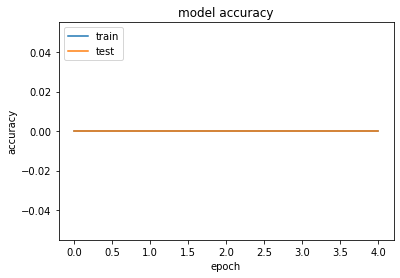

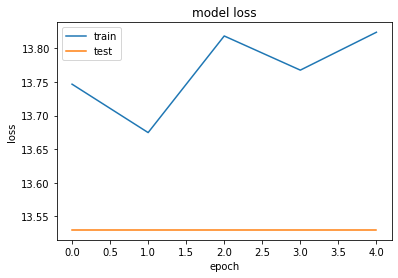

In [0]:
plt.plot(history.history['dense_6_acc'])
plt.plot(history.history['val_dense_6_acc'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['dense_6_loss'])
plt.plot(history.history['val_dense_6_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()